#  Predicting House Prices by MLR and optimized model  using Backward Elimination

Just started with machine learning. I have used backward Elimination to check the usefulness of dependent variables.

In [1]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('/content/House_data (1).csv')
#to see what my dataset is comprised of
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#checking if any value is missing
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [3]:
#checking for categorical data
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
#dropping the id and date column
dataset = dataset.drop(['id','date'], axis = 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

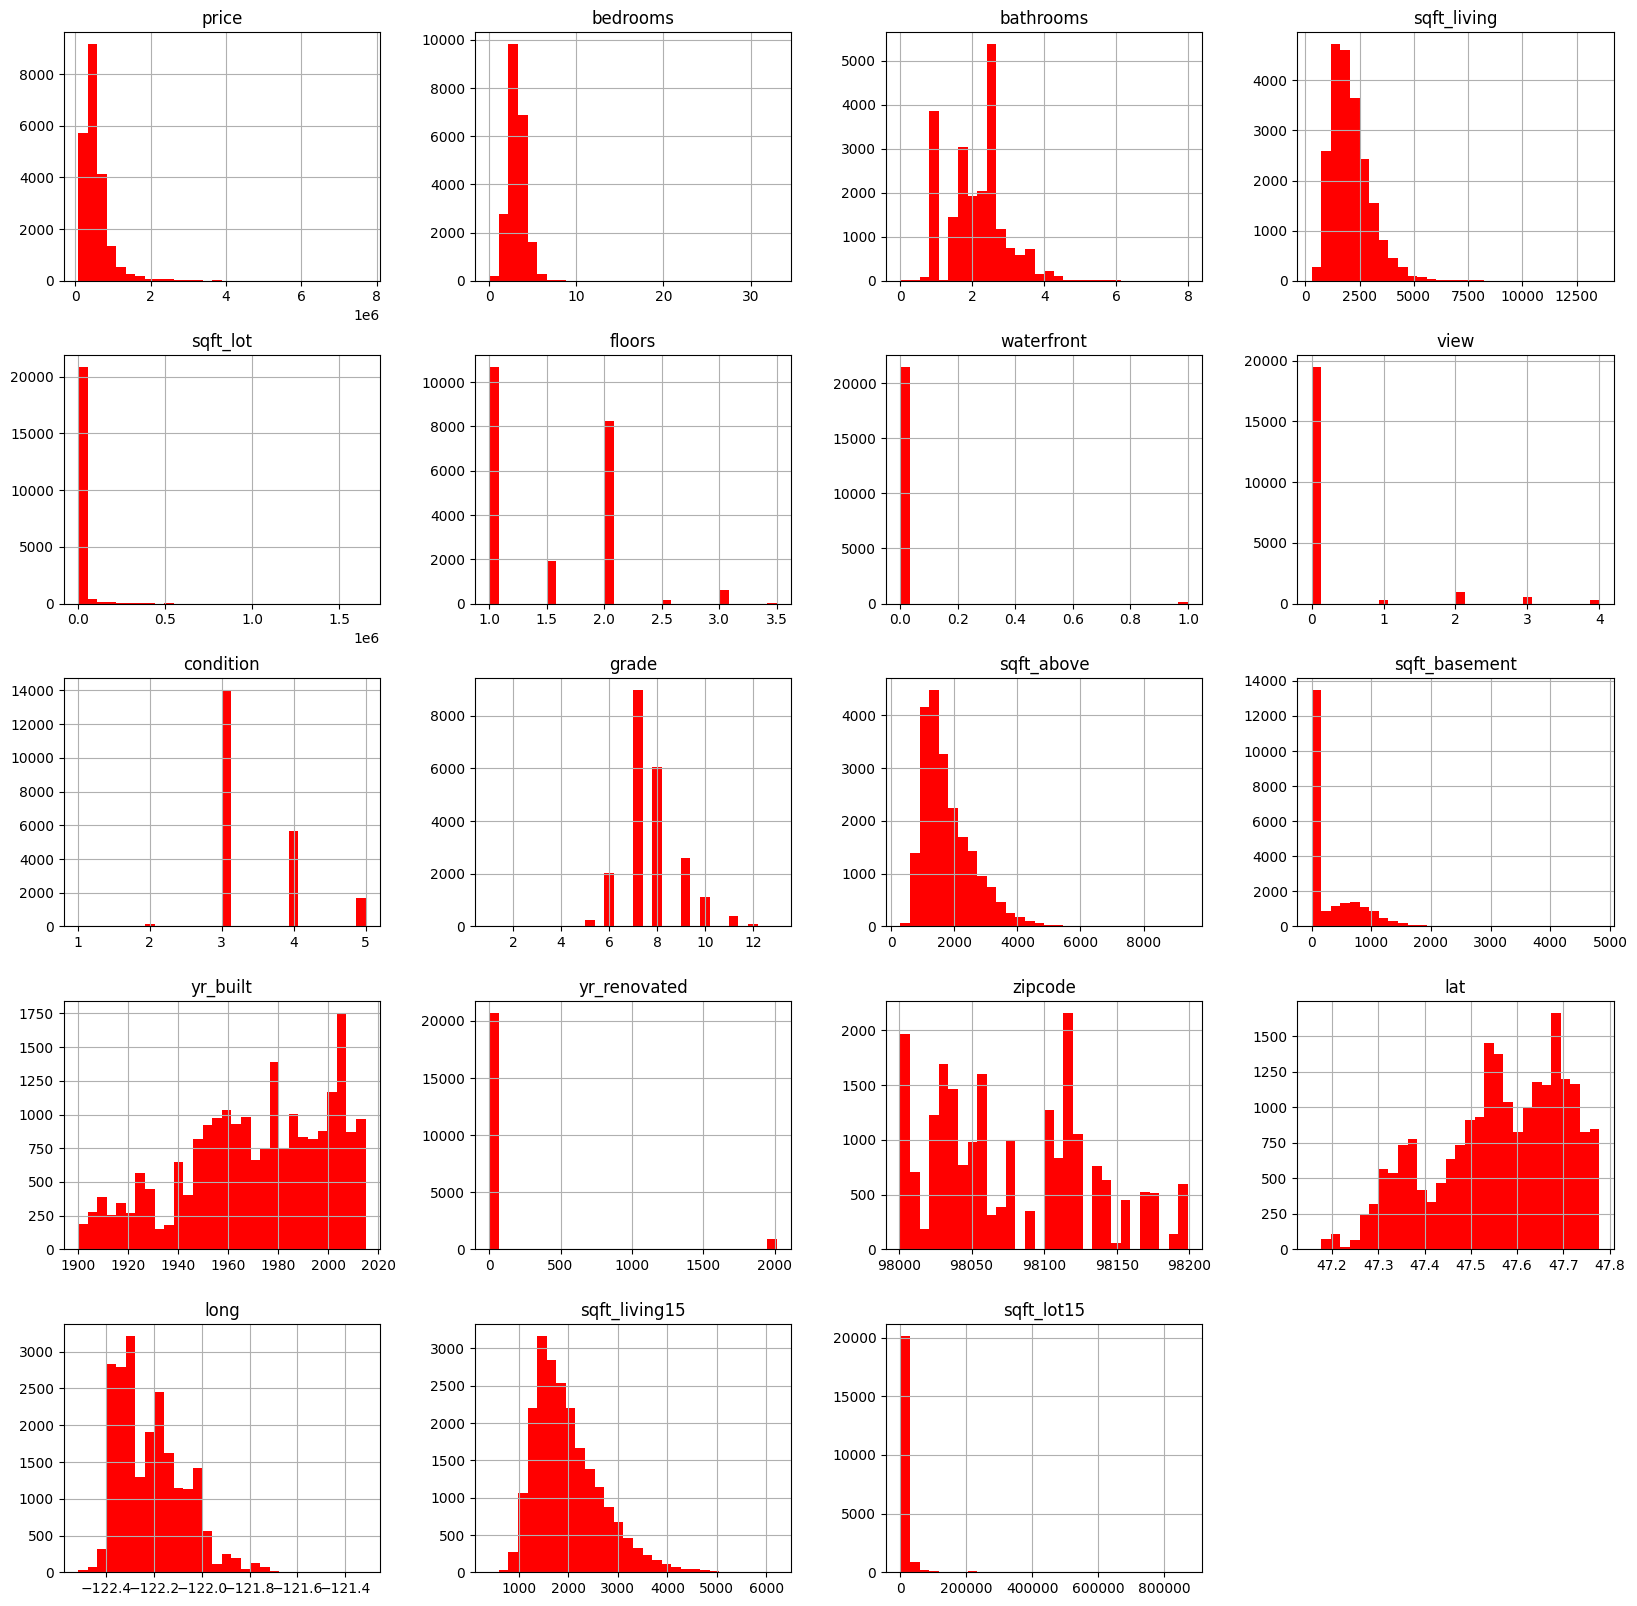

In [18]:
# see the distribution of numeric variable by histogram
dataset.hist(bins = 30, figsize = (20,20), color = 'r')

<Axes: >

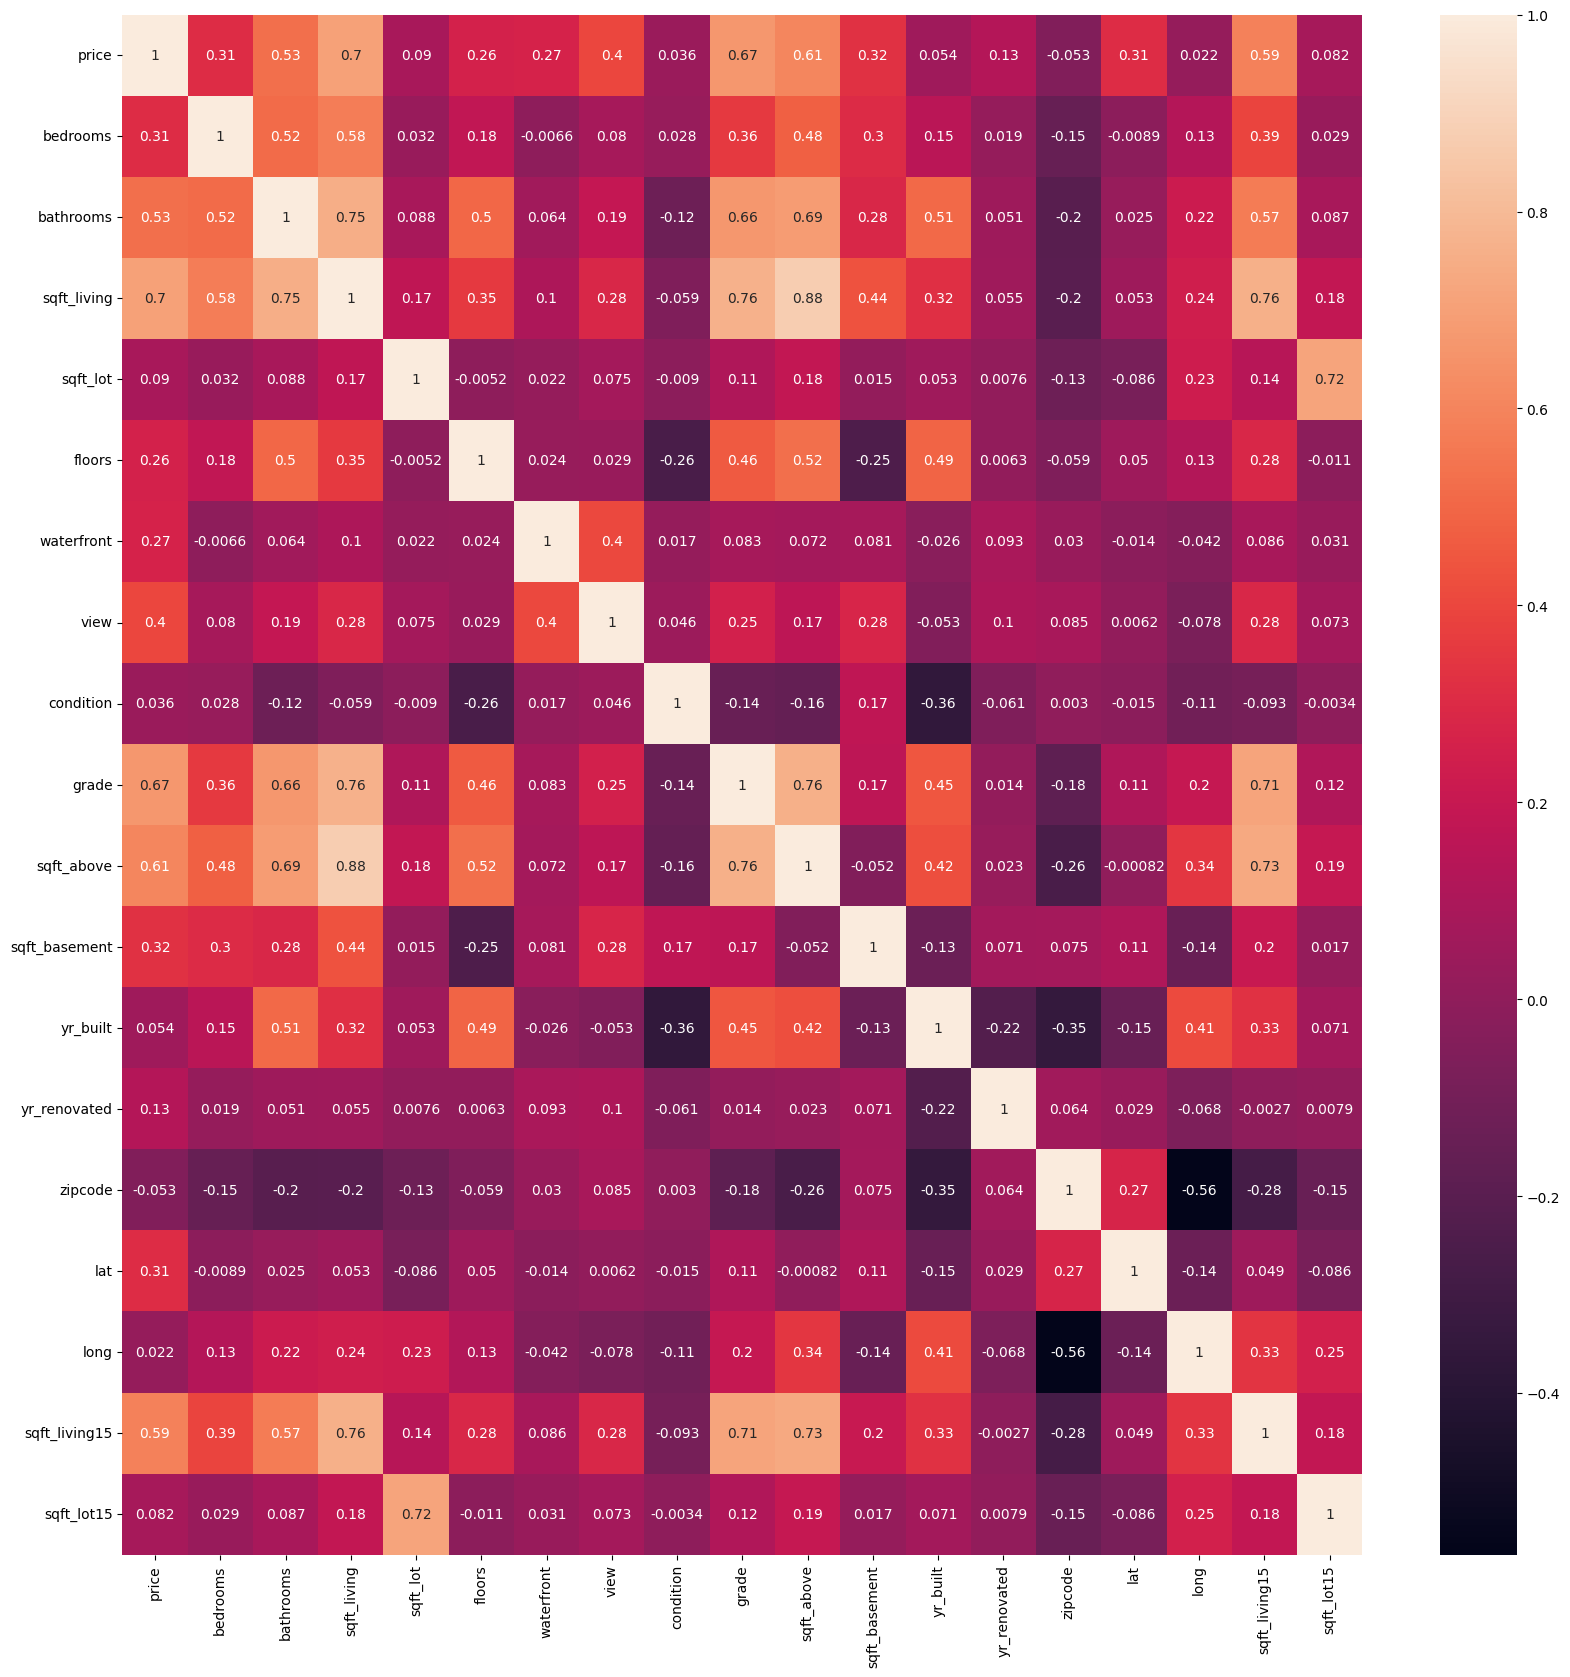

In [19]:
corelation = dataset.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corelation,annot = True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


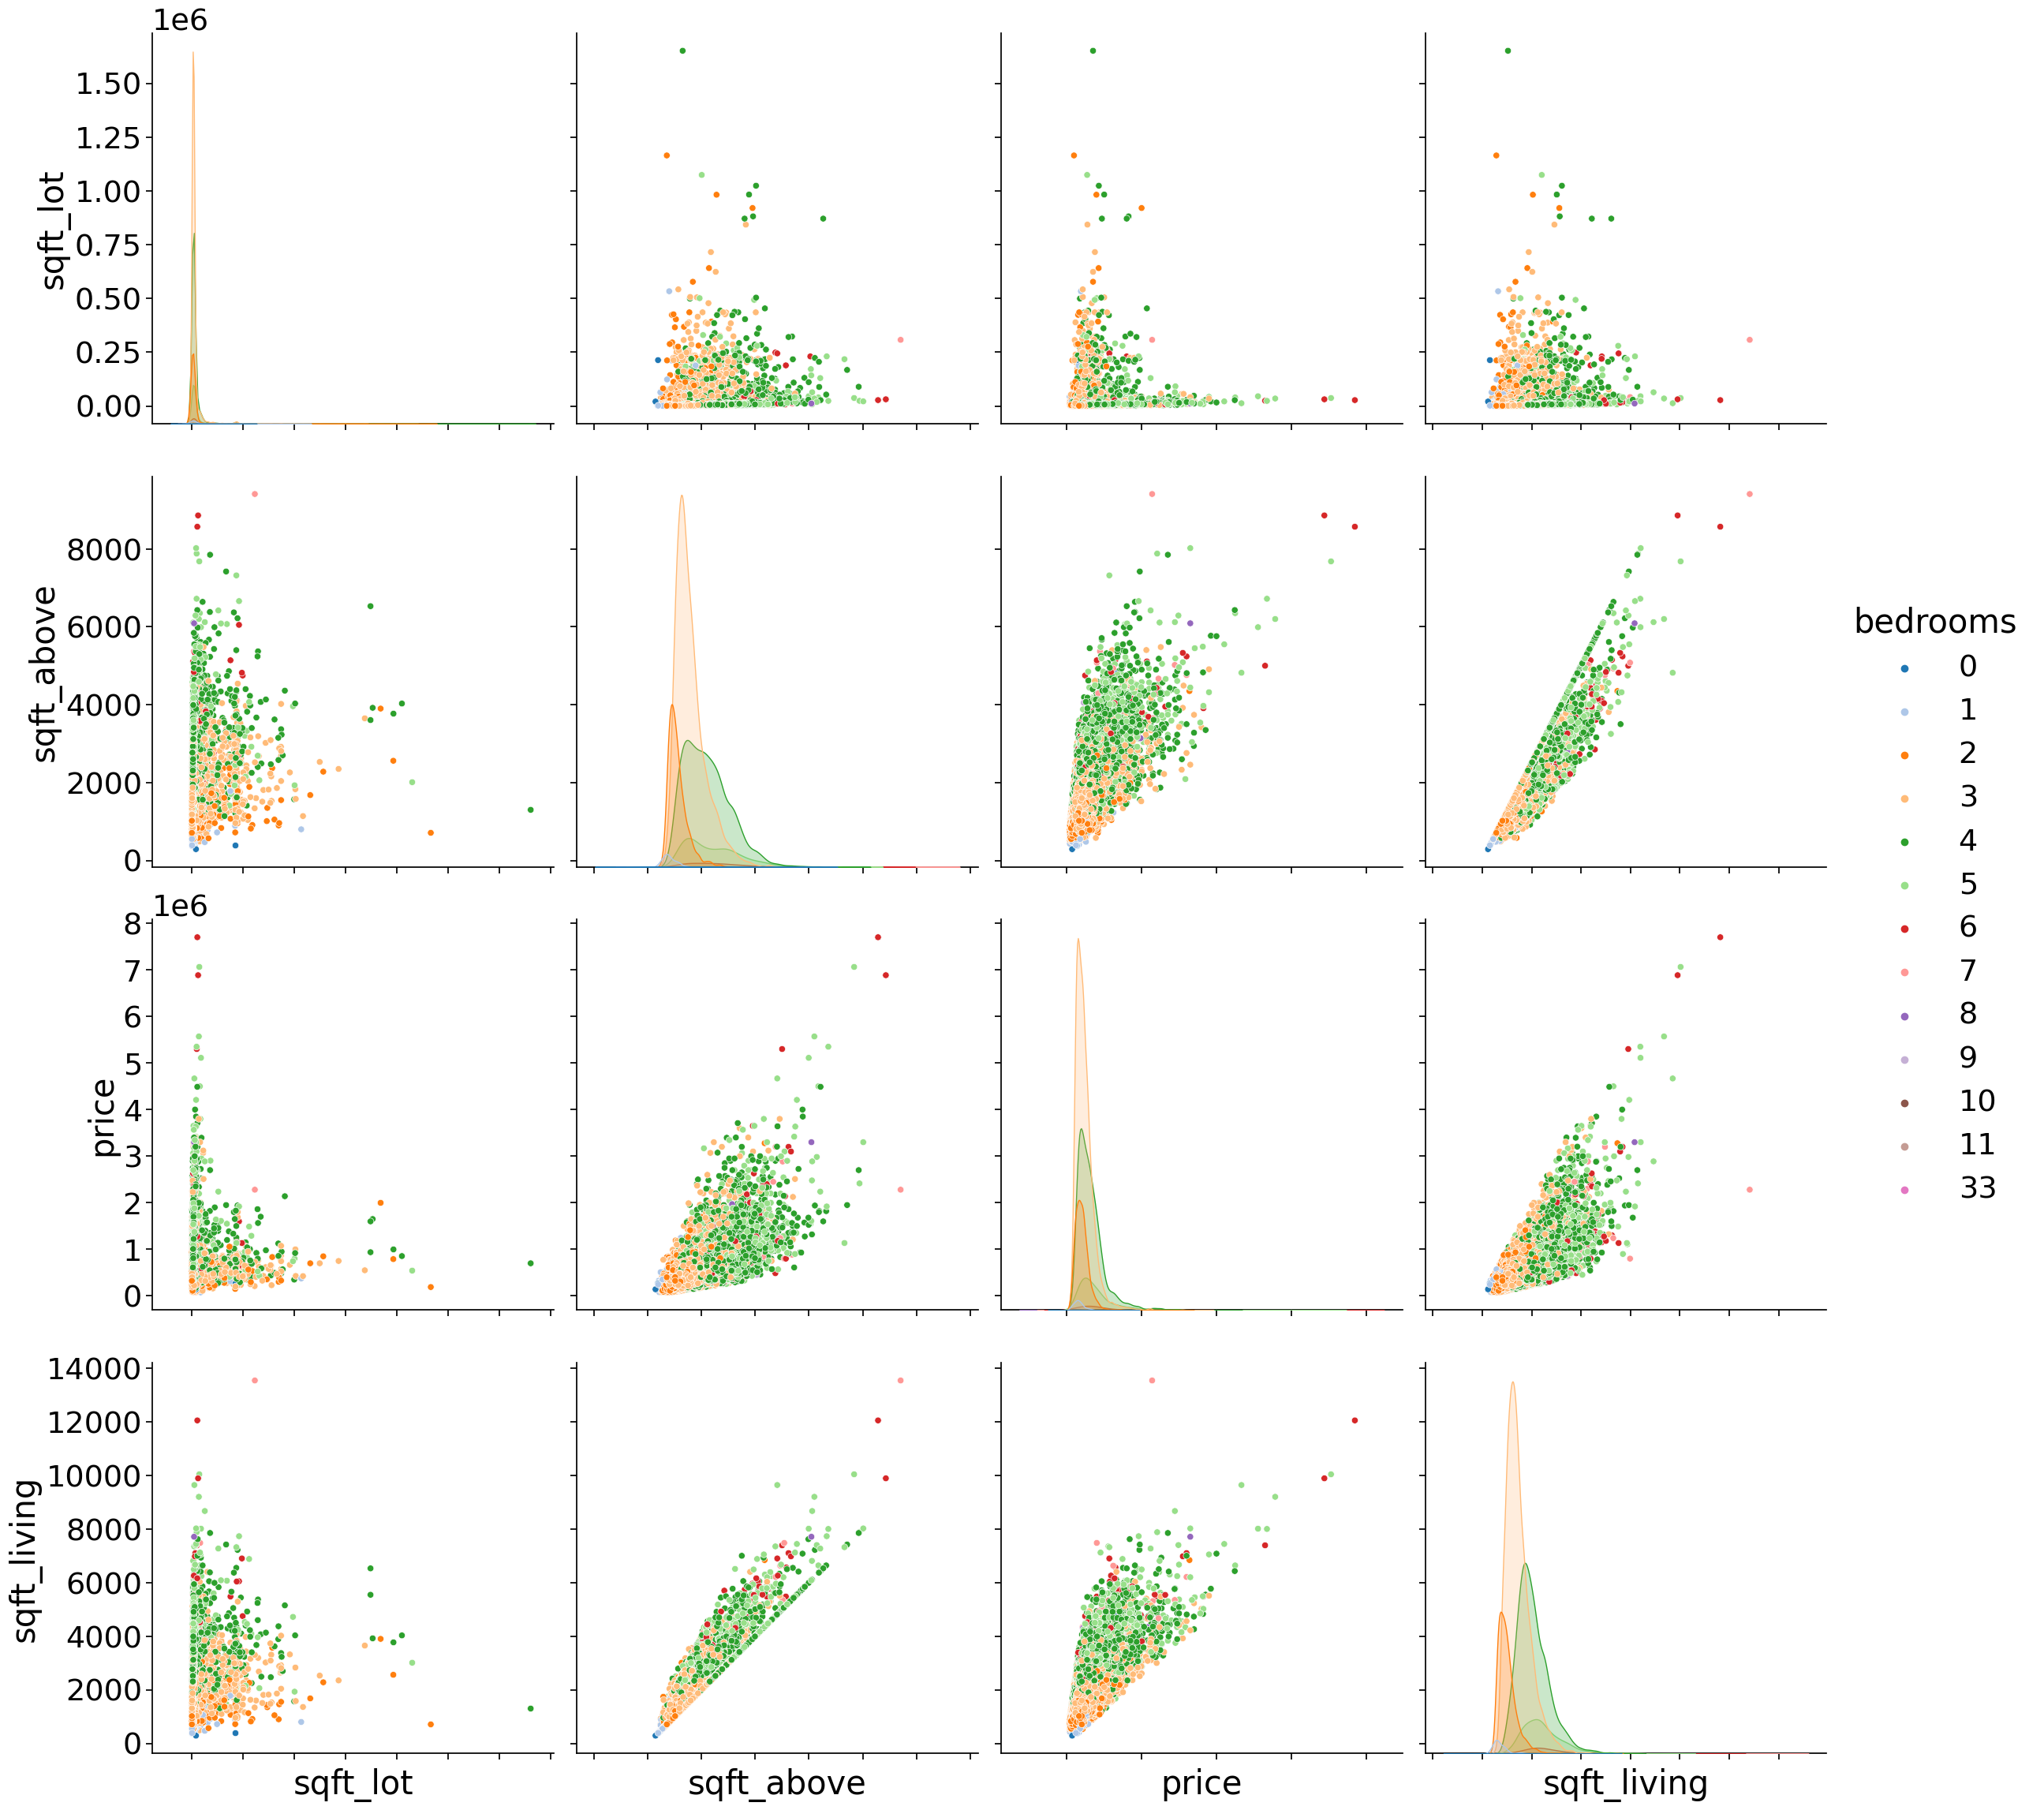

In [5]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [6]:
#separating independent and dependent variable
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [16]:
print(X_train)

[[ 3.00000e+00  1.50000e+00  1.26000e+03 ... -1.22123e+02  1.80000e+03
   1.03500e+04]
 [ 2.00000e+00  1.00000e+00  1.32000e+03 ... -1.22380e+02  1.36000e+03
   2.87300e+03]
 [ 3.00000e+00  1.00000e+00  9.20000e+02 ... -1.22269e+02  1.17000e+03
   9.60000e+03]
 ...
 [ 3.00000e+00  2.25000e+00  2.36000e+03 ... -1.22158e+02  2.72000e+03
   1.43880e+04]
 [ 4.00000e+00  2.00000e+00  2.37000e+03 ... -1.22279e+02  2.11000e+03
   1.93340e+04]
 [ 4.00000e+00  2.25000e+00  2.38000e+03 ... -1.22120e+02  2.23000e+03
   8.92500e+03]]


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [8]:
print(y_pred)

[ 386540.99847838 1516969.01534092  538662.72575261 ...  526000.7550575
  313924.63663324  400525.67314566]


In [15]:
#Backward Elimination
import statsmodels.api as sm
import numpy as np

def backwardElimination(x, y, SL):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if regressor_OLS.pvalues[j].astype(float) == maxVar:
                    x = np.delete(x, j, 1)
                    break
    return x, regressor_OLS.summary()

# Assuming you have X and y defined
SL = 0.05
X_opt = X  # Initialize X_opt with all features
X_Modeled, summary = backwardElimination(X_opt, y, SL)

# Print the summary statistics
print(summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.287e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:26:38   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21597   BIC:                                  5.894e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The warning about the smallest eigenvalue and the mention of potential multicollinearity issues suggest that there might be high collinearity among the independent variables in your model. Multicollinearity can cause numerical instability in estimating the model coefficients and their standard errors

In [20]:
#remove  variable which have multicolinearity and optimized the model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def backwardElimination(x, y, SL):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > SL:
            vif = [variance_inflation_factor(x, j) for j in range(x.shape[1])]
            maxVIF = max(vif)
            if maxVIF > 10:  # Adjust the threshold as needed
                remove_index = vif.index(maxVIF)
                x = np.delete(x, remove_index, 1)
            else:
                break
        else:
            break
    return x, regressor_OLS.summary()

# Assuming you have X and y defined
SL = 0.05
X_opt = X  # Initialize X_opt with all features
X_Modeled, summary = backwardElimination(X_opt, y, SL)

# Print the summary statistics
print(summary)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          1.660e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:58:15   Log-Likelihood:                     -2.9880e+05
No. Observations:               21613   AIC:                                  5.976e+05
Df Residuals:                   21605   BIC:                                  5.977e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Conclusion : By backward eleminating we see there are 17 varible that have p values less than 0.05 that have significant affacts in housing price and adjusted R-square is .905,  indicates that the model explains approximately 90% of the variance in the dependent variable, accounting for the number of predictors in the model. After treating the multicollinearity we found adjusted R squre decrease to 0.860 means this model , indicates that the model explains approximately 86% of the variance in the dependent variable, accounting for the number of predictors in the model.

Suggestion : this model may be improve more in further initiative like ingtercept addition or others
